# Перспективный проект для телеком-компании

Цель: определить тарифный план, который приносит больше денег.*

## Описание тарифных планов

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Задачи:
1. Познакомиться с данными

  (изучить таблицы с информацией о пользователях, звонках, сообщениях, трафике и тарифных планах)
2. Изучить данные

  (изменить формат данных, убрать лишние колонки из таблиц, избыточные значения из данных)
3. Дополнить данные

  (добавить столбцы, создать сводные таблицы для более простого анализа данных)
4. Проанализировать даные

  (вычислить среднее, медиану и стандартное распределение звонков, сообщений и трафика, построить графики, описать и объяснить распределение)
5. Выдвинуть и проверить гипотезы
- доходы от пользователей тарифов Smart и Ultra равны
- доходы от пользователей из Москвы и других регионов равны
6. Общий вывод и предложения

In [ ]:
#импортировать библиотеки для работы с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial

## 1. Знакомство с данными

Таблица **users** — информация о пользователях.

- user_id — уникальный идентификатор пользователя

- age — возраст пользователя (годы)

- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

- city — город проживания пользователя

- first_name — имя пользователя

- last_name — фамилия пользователя

- reg_date — дата подключения тарифа (день, месяц, год)

- tarif — название тарифного плана

In [ ]:
#открыть таблицу users и вывести первые 5 строк
users = pd.read_csv('users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица **calls** — информация о звонках.

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах (0 длительность — пропущенный звонок)
- user_id — идентификатор пользователя, сделавшего звонок

In [ ]:
#открыть таблицу calls и вывести первые 5 строк

calls = pd.read_csv('calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица **messages** — информация о сообщениях.

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [ ]:
#открыть таблицу messages и вывести первые 5 строк
messages = pd.read_csv('messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица **internet** — информация об интернет-сессиях.

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [ ]:
#открыть таблицу internet и вывести первые 5 строк
internet = pd.read_csv('internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица **tariffs** — информация о тарифах.

- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- tariff_name — название тарифа


In [ ]:
#открыть таблицу tariffs и загрузить 2 строки (это все строки)
tariffs = pd.read_csv('tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В каждой таблице, кроме **tariffs**, есть столбец **user_id**.

По таблице **users** узнаю точно количество пользователей в этой выборке, чтобы понимать, для какого числа юзеров нужно считать уникальные значения в таблицах **calls**, **messages** и **internet**.

In [ ]:
#посчитать количество пользователей (= количеству строк в таблице users)
users.shape[0]

500

Вывод:

- в таблице **users** — основная информация о пользователях. Могут пригодиться данные о возрасте, месте проживания и времени использования тарифа. Столбец с id пользователей поможет соотнести информацию о них с данными из других таблиц;
- в таблице **calls** — информация о времени звонков и длительности для каждого пользователя;
- в таблице **messages** — информация о времени отправки смс для каждого пользователя; 
- в таблице **internet** — информация о сессиях и количестве использованных мегабайт для каждого пользователя (**!** в таблице есть избыточный столбец, дублирующий индекс);
- в таблице **users** — информация о тарифных планах, представленных компанией.

## 2. Изучение данных

Проверю, корректны ли данные, при необходимости приведу к нужным типам, исправлю дубликаты, разберусь с пропущенными значениями.

### 2.1. Таблица users.

In [ ]:
#показать первые 10 строк таблицы
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Для начала проверю, данные какого типа хранятся в каждом столбце и не нужно ли это менять.

Также посмотрю на пропущенные значения и подумаю, как их заполнить.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Всего 500 значений.

Столбцы **charn_date** и **reg_date** содержат дату, однако формат данных указан object. Изменю его на datetime.

In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

Много нулевых значений в столбце **charn_date** — только 38 пользователей прекратили пользоваться тарифом, 462 остались с компанией. Меня предупреждали о нулевых значениях в этом столбце. Однако можно подробнее изучить срез пользователей, отказавшихся от тарифа.

Например, посмотреть, от какого тарифного плана больше отказывались и сколько времени на нем провели.

In [ ]:
not_users = users[pd.notnull(users['churn_date'])].reset_index(drop=True)
not_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
1,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
2,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
3,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
4,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


In [ ]:
not_users['tariff'].value_counts()

smart    23
ultra    15
Name: tariff, dtype: int64

In [ ]:
#медианное значение — количество дней, проведенных на тарифе Smart
(not_users[not_users['tariff'] == 'smart']['churn_date']-not_users[not_users['tariff'] == 'smart']['reg_date']).median()

Timedelta('95 days 00:00:00')

In [ ]:
#медианное значение — количество дней, проведенных на тарифе Ultra
(not_users[not_users['tariff'] == 'ultra']['churn_date']-not_users[not_users['tariff'] == 'ultra']['reg_date']).median()

Timedelta('119 days 00:00:00')

От тарифного плана Smart отказываются чаще, чем от Ultra (23 отказа против 15). На тарифе Ultra отказавшиеся задержались на 119 дней (медианное значение), а на тарифе Smart всего на 95 дней (медианное значение).

Также стоить проверить, а все ли 500 пользователей в таблице users уникальные, не внесли ли кого-то дважды.

In [ ]:
#проверить, сколько дубликатов в таблице. Если значение 0, значит, дубликатов нет
users.duplicated().sum()

0

Дубликатов нет.

### 2.2. Таблица calls

In [ ]:
#вывести первые 10 строк таблицы
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Для начала проверю, данные какого типа хранятся в каждом столбце и не нужно ли это менять.

Также посмотрю, есть ли пропущенные значения и как их заполнить.

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В данных нет пропущеных значений.
 
Однако есть звонки длительностью 0 минут. И хотя это не ошибка, а реальный звонок, судя по описанию данных, лучше бы проверить, не дают ли они искажений.

<Axes: ylabel='Frequency'>

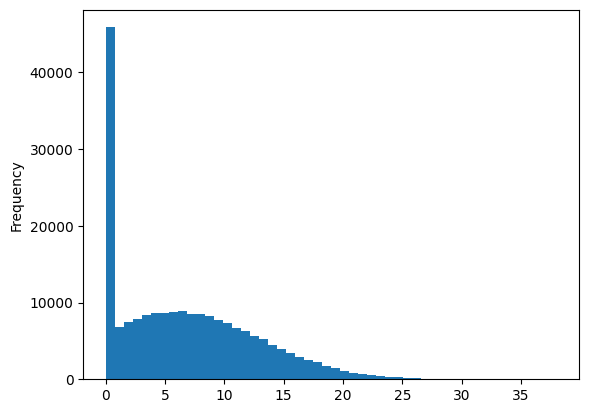

In [ ]:
calls['duration'].plot(kind='hist', bins=50)

Нулевых значений очень много. Плата со звонков длительностью 0 минут не взимается, округлить к большему их тоже нельзя. Но нужно проверить, точно ли нулевые звонки — это непринятые или сброшенные, а не все длительностью до 1 минуты.

In [ ]:
print('Количество нулевых звонков:', calls[calls['duration']==0.0]['duration'].count())
print('Количество звонков до 1 минуты:', calls[calls['duration']<1.0]['duration'].count())

Количество нулевых звонков: 39613
Количество звонков до 1 минуты: 47927


Звонков с нулевой длительностью меньше, чем с длительностью близко к нулю. Могу удалить нулевые и снова проверить, как теперь выглядит гистограмма распределения.

In [ ]:
calls = calls.query('duration != 0.0')

<Axes: ylabel='Frequency'>

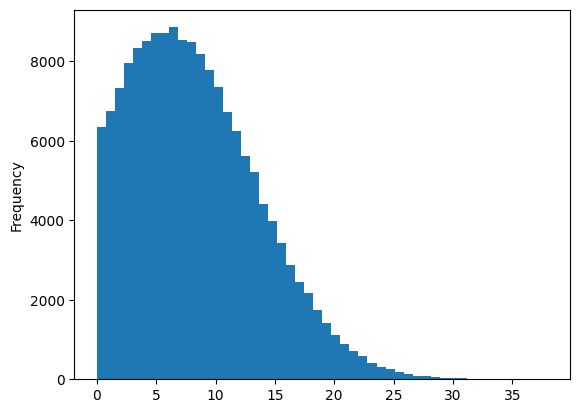

In [ ]:
calls['duration'].plot(kind='hist', bins=50)

Гораздо лучше.

Посмотрю, насколько сократилось количество значений в таблице.

In [ ]:
calls.shape[0]

162994

Было 202 607 записей, а осталось 162 994.

"Мегалайн" всегда округляет секунды до минут. Поэтому я сразу приведу данные из столбца **duration** к нужному виду.

In [ ]:
calls['duration'] = calls['duration'].apply(np.ceil)

Теперь можно поменять формат данных в столбце **duration** c float на integer.

In [ ]:
calls['duration'] = calls['duration'].astype('int')

В столбце call_date нужно поменять формат данных, т.к. в нем содержится дата.

In [ ]:
calls['call_date']=pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

Осталось проверить на дубликаты.

In [ ]:
#проверить на дубликаты. Если значение 0, значит, дубликатов нет
calls.duplicated().sum()

0

Дубликатов нет.

### 2.3. Таблица messages

In [ ]:
#вывести первые 10 строк таблицы
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Для начала проверю, данные какого типа хранятся в каждом столбце и не нужно ли это менять.

Также посмотрю, есть ли пропущенные значения и как их заполнить.

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Столбец message_date отвечает за дату отправки сообщения. Сейчас его формат object, я исправлю его на datetime.

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

Пропущенных значений нет. Убирать значения тоже не нужно.

### 2.4. Таблица internet

In [ ]:
#показать первые 10 строк таблицы
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Для начала проверю, данные какого типа хранятся в каждом столбце и не нужно ли это менять.

Также посмотрю, есть ли пропущенные значения и как их заполнить.

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропущенных значений нет.

Помня, что среди звонков были вызовы с нулевой длительностью, посмотрю, не было ли соединения c нулевым трафиком. И не каждое ли соединение с трафиком меньше 1 мегабайта равно 0.

<Axes: ylabel='Frequency'>

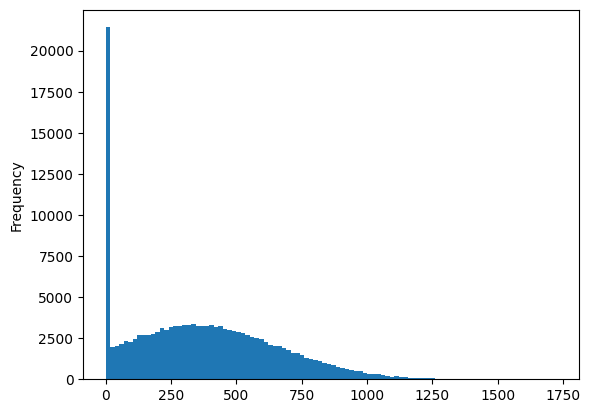

In [ ]:
internet['mb_used'].plot(kind='hist', bins=100)

In [ ]:
print('Затрачено 0 мебагайт:', internet[internet['mb_used'] == 0]['mb_used'].count())
print('Затрачено меньше 1 мегабайта:', internet[internet['mb_used'] < 1.0]['mb_used'].count())

Затрачено 0 мебагайт: 19598
Затрачено меньше 1 мегабайта: 19699


Не всегда нулевой трафик — это трафик до 1 мегабайта. От нулевых значений точно можно избавиться, а вот близкие к нулю убрать нельзя. Ведь компания округляет общее количество затраченных мегабайт в большую сторону.

In [ ]:
internet = internet.query('mb_used != 0.0')

<Axes: ylabel='Frequency'>

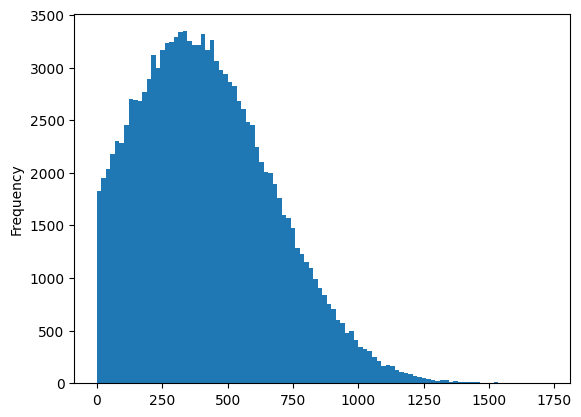

In [ ]:
internet['mb_used'].plot(kind='hist', bins=100)

Теперь выбросов в крайних значениях нет.

В столбце **session_date** хранится дата, однако сейчас формат данных object. Изменю его на datetime.

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

Также в таблице есть столбец **Unnamed: 0**.

Он дублирует индекс, а значит, никакой ценности не представляет. Удалю его.

In [ ]:
internet = internet.drop(columns = 'Unnamed: 0')

### Вывод:
- изменила формат даты во всех таблицах. Если будут операции с датами, считать будет проще и удобнее;
- удалила ненужный столбец в таблице internet;
- удалила данные о звонках продолжительностью 0 минут, потому что они никак не влияют на итоговую сумму, которую заплатит пользователь;
- удалила данные об интернет-сессиях с нулевым трафиком, они никак не влияют на итоговую сумму, которую заплатит пользователь;
- посмотрела, с какого тарифа чаще уходили пользователи и сколько медианного времени на нем проводили (всего 38 пользователей прекратили пользоваться тарифами, из них 23 Smart и 15 Ultra, первые продержались 95 дней (медианное значение), вторые — 119 дней (медианное значение).

## 3. Дополнение данных

Всего 500 пользователей. Для каждого я могу посчитать количество звонков, сообщений по месяцам, а также количество израсходованных минут и интернет-трафика.

Для этого в каждую таблицу нужно добавить столбец с номером месяца, а затем построить сводную таблицу. В ней будет храниться информация о совершенных в каждом месяце действиях для каждого пользователя.

!Важно помнить, что общее количество мегабайт округляется до гигабайт. 1 гигабайт = 1024 мегабайта.

### 3.1. Таблица users

In [ ]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице tariffs всего две строки (0 и 1), а мне надо к ним обращаться, чтобы в будущем посчитать доход от пользователей. Из-за несовпадения идексов могут быть ошибки.

Предлагаю создать дополнительный столбец в таблице users, в котором 0 будет соответствовать тарифу Smart, а 1 — тарифу Ultra.

In [ ]:
def tariff_code(name):
  if name == 'smart':
    return 0
  if name == 'ultra':
    return 1
users['tariff_code'] = users['tariff'].apply(tariff_code)

### 3.2. Таблица calls

In [ ]:
calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000


Добавлю столбец **month**, в нем будет храниться информация о месяце, в котором был зафиксирован вызов для каждого пользователя.

In [ ]:
calls['month'] = calls['call_date'].dt.month

Посчитаю количество минут, потраченных каждым пользователем, по месяцам.

In [ ]:
#cоздать таблицу для хранения информации о количестве потраченых минут
calls_duration = calls.pivot_table(index='user_id', columns='month', values = 'duration', aggfunc='sum')
calls_duration.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


В некоторых столбцах есть пропущенные значения. Это значит, что в указанный месяц пользователь не разговаривал по телефону, а может, вообще не был подключен ни к одному из тарифов "Мегалайна".

Посмотрю, сколько строк в сводных таблицах. Возможно, некоторые пользователи вообще не звонят.

In [ ]:
calls_duration.shape[0]

492

Действительно, только 492 пользователя из 500 используют звонки в тарифе.

### 3.3. Таблица messages

In [ ]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Добавлю в таблицу столбец **month** для дальнейших расчетов.

In [ ]:
messages['month'] = messages['message_date'].dt.month

Посчитаю количество сообщений, отправленных каждым пользователем, по месяцам.

In [ ]:
#создать таблицу с информацией о количестве отправленных сообщений
messages_number = messages.pivot_table(index='user_id', columns = 'month', values='id', aggfunc='count')
messages_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


Посмотрю, сколько строк в сводной таблице. Возможно, не все пользователи отправляют сообщения.

In [ ]:
messages_number.shape[0]

426

Только 426 пользователей из 500 используют смс-сообщения.

### 3.4. Таблица internet

In [ ]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Добавлю столбец **month**, чтобы удобнее было считать помесячные показатели.

In [ ]:
internet['month'] = internet['session_date'].dt.month

Посчитаю, сколько трафика израсходовал каждый пользователь по месяцам.

In [ ]:
#создать таблицу с информацией о затраченном абонентами трафике
internet_number = internet.pivot_table(index='user_id', columns='month', values = 'mb_used', aggfunc='sum')
internet_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


Итоговое количество трафика "Мегалайн" округляет до гигабайт в большую сторону. Например, 2253 мегабайта превратятся в 3 гигабайта (потому что 2 гигабайта = 2048 мегабайт, а 3 гигабайта = 3072).

Данные в сводной таблице тоже нужно округлить.

In [ ]:
#заменю значения в таблице на равные 1 и больше гигабайтам (но измеренным в мегабайтах, потому что именно так прописан лимит в tariffs)
for month in internet_number.columns:
  for id in internet['user_id'].unique():
    gig = 1024
    try:
      if internet_number[month][id] <= gig:
        internet_number[month][id] = gig
      else:
        internet_number[month][id] = int(np.ceil(internet_number[month][id]/gig)*1024)
    except:
      continue

In [ ]:
#проверка, изменились ли значения
internet_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3072.0,23552.0,14336.0,14336.0,15360.0,15360.0,15360.0,10240.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18432.0,14336.0
1002,NaN,NaN,NaN,NaN,NaN,11264.0,18432.0,20480.0,17408.0,14336.0,19456.0,18432.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9216.0,13312.0,15360.0,12288.0,10240.0
1004,NaN,NaN,NaN,NaN,14336.0,18432.0,22528.0,28672.0,15360.0,19456.0,16384.0,18432.0


Проверю, все ли пользователи выходят в интернет.

In [ ]:
internet_number.shape[0]

497

И снова нет, только 497 пользователей из 500 пользуются интернетом.

### 3.5. Подсчет выручки

На основе сводных таблиц и информации из таблицы tariffs создам новую, теперь с информацией о помесячной выручке для каждого пользователя (суммирую выручку с каждой услуги и сложу с платой за тариф).

####3.5.1. Выручка со звонков

In [ ]:
calls_duration.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


Создаю новую таблицу, в которую сохраню информацию о доходе от каждого пользователя, звонившего хотя бы один раз (с длительностью звонков больше 0 секунд).

In [ ]:
calls_profit = calls_duration

Вычитаю из количества минут, проговоренных пользователями, количество входящих в тариф минут.

Если это число больше нуля, значит, лимит превышен, и можно посчитать доход (умножить результат на сумму, взимаемую за каждую минуту сверх лимита). Если же число меньше нуля, значит, пользователь уложился в лимит, и доход нулевой.

In [ ]:
for month in calls_profit.columns:
  for id in calls['user_id'].unique():
    tariff = users[users['user_id']==id]['tariff_code']
    minuend = calls_profit[month][id]
    subtrahend = tariffs['minutes_included'][tariff]
    residual = minuend-subtrahend
    calls_profit[month][id] = residual
    if calls_profit[month][id] > 0:
      calls_profit[month][id] = calls_profit[month][id]*tariffs['rub_per_minute'][tariff]
    if calls_profit[month][id] <= 0:
      calls_profit[month][id] = 0
    else:
      continue

####3.5.2. Выручка с сообщений

In [ ]:
messages_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


Создаю новую таблицу, в которую сохраню информацию о доходе для каждого пользователя, отправлявшего сообщения хотя бы один раз.

In [ ]:
messages_profit = messages_number

Вычитаю из количества сообщений, отправленных пользователем, количество входящих в тариф сообщений.

Если это число больше нуля, значит, лимит превышен, и можно посчитать доход (умножить результат на сумму, взимаемую за каждое сообщение сверх лимита). Если же число меньше нуля, значит, пользователь уложился в лимит, и доход нулевой.

In [ ]:
for month in messages_profit.columns:
  for id in messages['user_id'].unique():
    tariff = users[users['user_id']==id]['tariff_code']
    minuend = messages_profit[month][id]
    subtrahend = tariffs['messages_included'][tariff]
    residual = minuend-subtrahend
    messages_profit[month][id] = residual
    if messages_profit[month][id] > 0:
      messages_profit[month][id] = messages_profit[month][id]*tariffs['rub_per_message'][tariff]
    if messages_profit[month][id] <= 0:
      messages_profit[month][id] = 0
    else:
      continue

####3.5.3. Выручка с интернет-трафика

In [ ]:
internet_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3072.0,23552.0,14336.0,14336.0,15360.0,15360.0,15360.0,10240.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18432.0,14336.0
1002,NaN,NaN,NaN,NaN,NaN,11264.0,18432.0,20480.0,17408.0,14336.0,19456.0,18432.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9216.0,13312.0,15360.0,12288.0,10240.0
1004,NaN,NaN,NaN,NaN,14336.0,18432.0,22528.0,28672.0,15360.0,19456.0,16384.0,18432.0


Создаю новую таблицу, в которую сохраню информацию о доходе от каждого пользователя, заходившего в интернет хотя бы один раз.

In [ ]:
internet_profit = internet_number

Вычитаю из количества использованного трафика лимит по тарифу.

Если это число больше нуля, значит, лимит превышен, и можно посчитать доход (умножить результат на сумму, взимаемую за каждый гигабайт сверх лимита). Если же число меньше нуля, значит, пользователь уложился в лимит, и доход нулевой.

In [ ]:
for month in internet_profit.columns:
  for id in internet['user_id'].unique():
    tariff = users[users['user_id']==id]['tariff_code']
    minuend = internet_profit[month][id]
    subtrahend = tariffs['mb_per_month_included'][tariff]
    residual = minuend-subtrahend
    internet_profit[month][id] = residual
    if internet_profit[month][id] > 0:
      internet_profit[month][id] = (internet_profit[month][id]/1024)*tariffs['rub_per_gb'][tariff]
    if internet_profit[month][id] <= 0:
      internet_profit[month][id] = 0
    else:
      continue

####3.5.4. Общие помесячные расходы каждого пользователя

Для начала создаю таблицу, в которой будет храниться информация об общих расходах каждого пользователя по месяцам. Для этого складываю значения каждой из трех таблиц доходов, а также стоимость тарифа, к которому подключен пользователь.

Мне нужно, чтобы сохранились в т.ч. NaN значения — не все пользователи с января подключены к "Мегалайну", и в итоговой таблице это должно быть отражено. Поэтому метод concat() для таблицы не подходит (он заменяет NaN нулями). Буду действовать через цикл.

In [ ]:
rub_per_month = pd.DataFrame()
for month in calls_profit.columns:
  profit = []
  for id in users['user_id']:
    a=0
    try:
      a+= calls_profit[month][id]
    except:
      a+=0
    try:
      a+= messages_profit[month][id]
    except:
      a+=0
    try:
      a+= internet_profit[month][id]
    except:
      a+=0
    a+= tariffs['rub_monthly_fee'][users[users['user_id']==id]['tariff_code']]
    profit.append(a)
  rub_per_month[month] = profit

Приведу все данные к типу float. Поскольку сохранила NaN значения, не могу выбрать integer, хотя с целыми числами работать было бы удобнее.

In [ ]:
rub_per_month = rub_per_month.astype('float')

Посмотрю, как выглядят первые 10 строк новой таблицы.

In [ ]:
rub_per_month.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
2,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
4,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
6,NaN,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
7,NaN,NaN,NaN,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.0
9,NaN,NaN,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0


Проверю размер таблицы.

In [ ]:
print(len(rub_per_month))

500


Посмотрю, не оказались ли в таблице ячейки со значением 0. Их быть не должно, т.к., даже если пользователи укладывались в лимит, они все равно платили за тариф.

In [ ]:
sum_of_nulls = 0
for month in rub_per_month.columns:
  sum_of_nulls += rub_per_month[month].isin([0]).sum()
print('Нулевых значений в таблице:', sum_of_nulls)

Нулевых значений в таблице: 0


Отлично. Каждый пользователь заплатил хотя бы за один месяц.

Значения NaN показывают месяцы, в которые пользователь еще не был подключен к "Мегалайну".

Всего в таблице 500 значений, 0 строка соответствует пользователю с id 1000, 499 — пользователю с id 1499.

Создам итоговую таблицу с информацией о user_id, тарифе и доходе от пользователя по месяцам.

In [ ]:
final_data = users[['user_id', 'tariff']].join(rub_per_month)

Выведу первые 10 строк таблицы.

In [ ]:
final_data.head(10)

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
2,1002,smart,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,1005,smart,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
6,1006,smart,NaN,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
7,1007,smart,NaN,NaN,NaN,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0
8,1008,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.0
9,1009,smart,NaN,NaN,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0


Вывод:
- посчитала количество израсходованных минут по месяцам для каждого пользователя;
- посчитала количество смс по месяцам для каждого пользователя;
- посчитала количество трафика в месяц для каждого пользователя и округлила его до гигабайт (таковы условия "Мегалайна");
- посчитала доход с каждой минуты разговора, смс и потраченных мегабайт сверх лимита;
- создала общую таблицу с информацией о пользователях, их тарифе и выручке с пользователей за каждый месяц.

Можно приступать к исследованию данных.

## 4. Анализ данных

Посмотрю, как ведут себя пользователи тарифов. Для этого разделю каждую сводную таблицу на две — для абонентов Smart и Ultra. Узнаю характерные значения таблиц, а также дисперсию и стандартное отклонение, и проиллюстрирую графиками полученный результат.

Создам списки с id пользователей тарифов Smart и Ultra, чтобы легче было сортировать данные.

In [ ]:
smart_id = list([id for id in users[users['tariff']=='smart']['user_id']])
ultra_id = list([id for id in users[users['tariff']=='ultra']['user_id']])

### 4.1. Описание звонков

In [ ]:
calls_duration = calls.pivot_table(index='user_id', columns='month', values = 'duration', aggfunc='sum')

Создам две таблицы из calls_duration — для пользователей тарифа Smart и тарифа Ultra.

In [ ]:
smart_calls_duration = pd.DataFrame()
ultra_calls_duration = pd.DataFrame()

for index in calls_duration.index:
  if index in smart_id:
    smart_calls_duration = pd.concat([smart_calls_duration, calls_duration.loc[[index]]])
  if index in ultra_id:
    ultra_calls_duration = pd.concat([ultra_calls_duration, calls_duration.loc[[index]]])
  else:
    continue

In [ ]:
#вывести таблицу с длительностью звонков пользователей Smart
smart_calls_duration.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1005,95.0,456.0,606.0,712.0,595.0,612.0,569.0,619.0,479.0,723.0,547.0,592.0
1006,NaN,42.0,286.0,356.0,370.0,478.0,316.0,275.0,360.0,267.0,372.0,379.0
1007,NaN,NaN,NaN,198.0,480.0,545.0,577.0,458.0,655.0,465.0,580.0,421.0


In [ ]:
#вывести таблицу с длительностью звонков пользователей Ultra
ultra_calls_duration.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369.0,567.0
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,94.0


Теперь посчитаю медиану для каждой таблицы — это число минут, которые нужны абонентам на каждом тарифе. 

Сделаю подсчеты по месяцам, а затем в целом за год.

In [ ]:
print('Пользователям тарифа Smart нужно:\n', smart_calls_duration.median(), '\nВ месяц:', smart_calls_duration.median().median(),'\n(медианное значение)')
print('\n')
print('Пользователям тарифа Ultra нужно:\n', ultra_calls_duration.median(), '\nВ месяц:', ultra_calls_duration.median().median(), '\n(медианное значение)')

Пользователям тарифа Smart нужно:
 month
1     172.0
2     258.0
3     409.0
4     371.0
5     433.0
6     401.0
7     414.0
8     432.5
9     436.0
10    428.0
11    430.0
12    471.0
dtype: float64 
В месяц: 421.0 
(медианное значение)


Пользователям тарифа Ultra нужно:
 month
1     382.0
2     172.0
3     403.0
4     485.0
5     527.0
6     483.0
7     575.0
8     516.5
9     532.5
10    540.0
11    552.0
12    592.0
dtype: float64 
В месяц: 521.75 
(медианное значение)


Согласно медианному значию, пользователи тарифа Ultra разговаривают дольше. Им нужно около 522 минут в месяц, а пользователям тарифа Smart только 421 минута.

При этом медианное значение меняется от месяца к месяцу. И, например, в феврале и в марте абоненты с тарифом Smart разговаривали дольше.

Заметна тенденция к увеличению времени разговора от начала к концу года.

Теперь посмотрю среднее значение, дисперсию и стандартное отклонение.

Дисперсия и стандартное отклонение покажут, насколько значения датасета разбросаны — отклоняются от среднего арифметического.

In [ ]:
print('Среднее арифметическое по звонкам тарифа Smart:\n', smart_calls_duration.mean(), '\nВ среднем за 12 месяцев:', smart_calls_duration.mean().mean())
print('\n')
print('Среднее арифметическое по звонкам тарифа Ultra:\n', ultra_calls_duration.mean(), '\nВ среднем за 12 месяцев:', ultra_calls_duration.mean().mean())

Среднее арифметическое по звонкам тарифа Smart:
 month
1     210.030303
2     298.689655
3     390.051948
4     370.441441
5     387.361702
6     398.067485
7     408.353234
8     423.269231
9     430.266409
10    427.590444
11    436.647619
12    479.985119
dtype: float64 
В среднем за 12 месяцев: 388.3962158445061


Среднее арифметическое по звонкам тарифа Ultra:
 month
1     428.111111
2     310.043478
3     489.648649
4     475.301887
5     534.250000
6     497.469136
7     570.885057
8     535.813725
9     563.963636
10    581.728814
11    562.364341
12    614.925373
dtype: float64 
В среднем за 12 месяцев: 513.7087673099641


Среднее арифметическое демонстрирует, что пользователи тарифа Ultra в среднем дольше разговаривают по телефону, чем пользователи тарифа Smart.

Теперь проверю дисперсию и стандартное отклонение. Эти данные нужны, чтобы узнать, насколько значения в выборке отличаются от среднего арифметического и как много вариантов находятся возле среднего значения моей выборки.

In [ ]:
print('Дисперсия длительности вызовов по месяцам для абонентов Smart')
for month in smart_calls_duration.columns:
  print(month, '—', np.var(smart_calls_duration[month]))
print('\n')
print('Дисперсия длительности вызовов по месяцам для абонентов Ultra')
for month in ultra_calls_duration.columns:
  print(month, '—', np.var(ultra_calls_duration[month]))

Дисперсия длительности вызовов по месяцам для абонентов Smart
1 — 22489.908172635445
2 — 35784.489892984544
3 — 36344.932366334964
4 — 33552.96729161594
5 — 34573.11030632262
6 — 29776.713237231357
7 — 32089.820499492587
8 — 34031.21383957923
9 — 32823.30740448115
10 — 34770.45342403522
11 — 31001.87900226758
12 — 39014.984897604874


Дисперсия длительности вызовов по месяцам для абонентов Ultra
1 — 64683.87654320987
2 — 83914.38941398867
3 — 108374.49817384951
4 — 64790.85226059095
5 — 73711.0
6 — 84957.68114616675
7 — 83249.06724798521
8 — 88382.2103998462
9 — 95732.54413223141
10 — 96317.11289859234
11 — 87763.96803076737
12 — 107175.20338605481


Дисперсия большая, значения далеки от среднего.

In [ ]:
print('Стандартное отклонение длительности вызовов по месяцам для абонентов Smart')
for month in smart_calls_duration.columns:
  print(month, '—', np.std(smart_calls_duration[month]))
print('\n')
print('Стандартное отклонение длительности вызовов по месяцам для абонентов Ultra')
for month in ultra_calls_duration.columns:
  print(month, '—', np.std(ultra_calls_duration[month]))

Стандартное отклонение длительности вызовов по месяцам для абонентов Smart
1 — 149.96635680256904
2 — 189.16788811260898
3 — 190.64346924648368
4 — 183.1746906415183
5 — 185.93845838427998
6 — 172.55930353716474
7 — 179.13631820346367
8 — 184.4755101350291
9 — 181.1720381418754
10 — 186.46837110897715
11 — 176.07350454360696
12 — 197.5221124269505


Стандартное отклонение длительности вызовов по месяцам для абонентов Ultra
1 — 254.33025094001277
2 — 289.67980498127355
3 — 329.20282224466047
4 — 254.54047273585186
5 — 271.49769796445787
6 — 291.47500947108097
7 — 288.5291445382688
8 — 297.2914569910245
9 — 309.4067616136264
10 — 310.3499845313229
11 — 296.24984055821426
12 — 327.37624132800903


Стандартное отклонение — корень из дисперсии. Разброс данных все еще большой. Посмотрим на графиках.

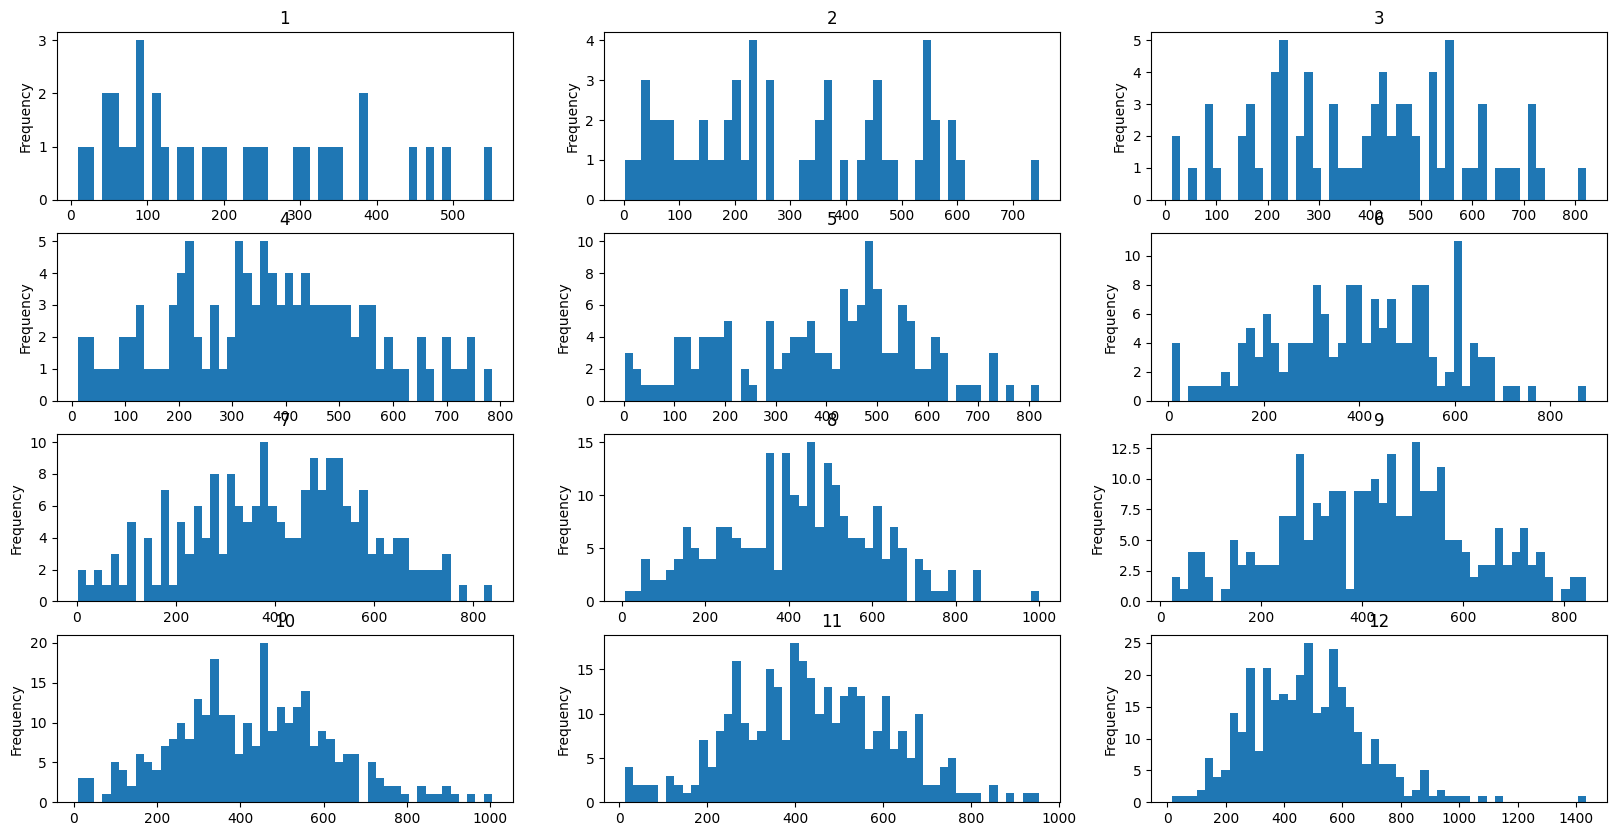

In [ ]:
for month in smart_calls_duration.columns:
  plt.subplot(4,3,int(month))
  graph = smart_calls_duration[month].plot(kind='hist', bins = 50, figsize = (20,10), label=month)
  graph.set_title(month)

Чем ближе к концу года, тем больше распределение стремится к нормальному (см. последние графики). Однако на графиках ясно видно, что в наборе данных есть выбросы. Это не аномальные значения. Тем не менее, получается, что и далекая от среднего значения длительность звонков встречается почти так же часто, как средняя. А в первые месяцы гауссиана и вовсе не выстраивается. 

In [ ]:
smart_calls_duration.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,33.000000,58.000000,77.000000,111.000000,141.000000,163.000000,201.000000,234.000000,259.000000,293.000000,315.000000,336.000000
mean,210.030303,298.689655,390.051948,370.441441,387.361702,398.067485,408.353234,423.269231,430.266409,427.590444,436.647619,479.985119
std,152.291555,190.820041,191.893604,184.005419,186.601343,173.091075,179.583601,184.870956,181.522807,186.787393,176.353653,197.816702
min,9.000000,2.000000,13.000000,11.000000,2.000000,7.000000,2.000000,7.000000,23.000000,9.000000,12.000000,15.000000
25%,85.000000,137.000000,234.000000,223.500000,213.000000,275.500000,281.000000,291.000000,298.500000,297.000000,313.000000,340.000000
50%,172.000000,258.000000,409.000000,371.000000,433.000000,401.000000,414.000000,432.500000,436.000000,428.000000,430.000000,471.000000
75%,332.000000,457.500000,530.000000,496.000000,512.000000,523.000000,535.000000,537.750000,550.000000,549.000000,554.500000,600.750000
max,551.000000,747.000000,822.000000,785.000000,820.000000,875.000000,839.000000,1000.000000,843.000000,1005.000000,954.000000,1435.000000


Посмотрю на описание распределения для таблицы smart_calls_duration.

Оно подтверждает показанное на гистограмме. Например, в январе гауссиана не выстраивалась и, судя по описанию, распределение в этом месяце не симметрично. Так, расстояние между минимумом и Q1 не равно расстоянию от Q3 до максимума, и расстояние от Q1 до медианы не равно расстоянию от Q2 до Q3.

Зато в октябре — 10 график ближе всего к нормальному распределению — расстояние от Q1 до медианы и от медианы до Q3 очень близко, правда, сильно различается расстояние от минимума до Q1 и от Q3 до максимума.

Распределение стало стремиться к нормальному именно на последних графиках, потому что к тарифу подключилось больше абонентов, данных в выборке стало больше.

Распределение не стало симметричным, потому что не все, кто подключен к тарифу Smart, выбирали его для звонков, поэтому продолжительность разговоров совершенно разная и не упорядочивается.

Теперь проделаю то же самое для пользователей тарифа Ultra.

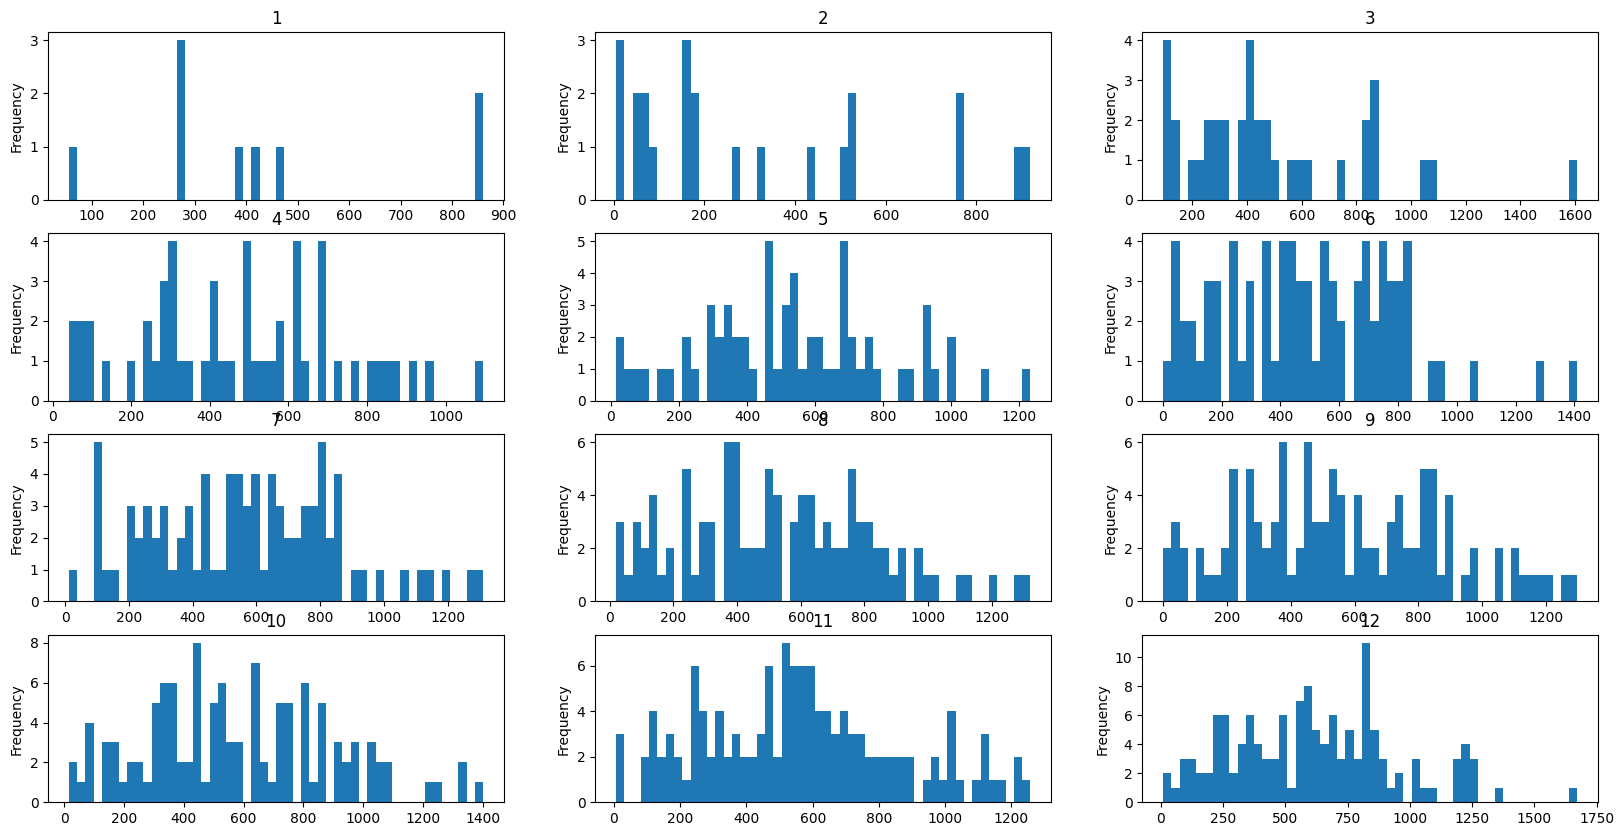

In [ ]:
for month in ultra_calls_duration.columns:
  plt.subplot(4,3,int(month))
  graph = ultra_calls_duration[month].plot(kind='hist', bins = 50, figsize = (20,10))
  graph.set_title(month)

С увеличением числа абонентов распределение все больше стремится к нормальному. Но январский график вообще не похож на гауссиану, потому что звонков было очень мало. В данных есть выбросы, а многие далекие от среднего значения (по оси X) близки ему по оси Y, т.е. по количеству раз, когда абоненты разговаривали определенное количество минут.

In [ ]:
ultra_calls_duration.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,9.000000,23.000000,37.000000,53.000000,64.000000,81.000000,87.000000,102.000000,110.000000,118.000000,129.000000,134.000000
mean,428.111111,310.043478,489.648649,475.301887,534.250000,497.469136,570.885057,535.813725,563.963636,581.728814,562.364341,614.925373
std,269.757968,296.190276,333.743765,256.976322,273.643958,293.291071,290.201791,298.759572,310.822818,311.673445,297.404815,328.604674
min,55.000000,5.000000,92.000000,41.000000,15.000000,1.000000,12.000000,20.000000,1.000000,16.000000,6.000000,9.000000
25%,272.000000,68.000000,256.000000,282.000000,344.500000,270.000000,346.000000,311.000000,335.750000,345.500000,328.000000,361.500000
50%,382.000000,172.000000,403.000000,485.000000,527.000000,483.000000,575.000000,516.500000,532.500000,540.000000,552.000000,592.000000
75%,466.000000,519.500000,626.000000,636.000000,696.500000,719.000000,774.000000,754.500000,802.750000,810.750000,732.000000,822.750000
max,861.000000,919.000000,1609.000000,1096.000000,1232.000000,1410.000000,1311.000000,1321.000000,1297.000000,1401.000000,1257.000000,1673.000000


Интересно, что для пользователей тарифа Ultra описание распределения говорит о его симметричности в начале, но на графиках очевидно, что это ложное предположение.

Распределение стало стремиться к нормальному именно на последних графиках, потому что к тарифу подключилось больше абонентов, данных в выборке стало больше.

Распределение не стало симметричным, потому что не все, кто подключен к тарифу Smart, выбирали его для звонков, так что продолжительность разговоров совершенно разная и не упорядочивается.

### 4.2. Описание сообщений

In [ ]:
messages_number = messages.pivot_table(index='user_id', columns = 'month', values='id', aggfunc='count')

Создам две новые таблицы. В **smart_messages_number** будет храниться информация о количестве сообщений, отправленных абонентами тарифа Smart. В **ultra_messages_number** — информация о количестве сообщений, отправленных абонентами тарифа Ultra.

In [ ]:
smart_messages_number = pd.DataFrame()
ultra_messages_number = pd.DataFrame()

for index in messages_number.index:
  if index in smart_id:
    smart_messages_number = pd.concat([smart_messages_number, messages_number.loc[[index]]])
  if index in ultra_id:
    ultra_messages_number = pd.concat([ultra_messages_number, messages_number.loc[[index]]])
  else:
    continue

Выведу по 5 первых строк обеих таблиц.

In [ ]:
smart_messages_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,18.0,21.0,26.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,15.0,11.0,12.0


In [ ]:
ultra_messages_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,25.0
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,103.0


Теперь получу описание для таблицы smart_messages_number, чтобы узнать среднее, медиану, дисперсию каждого столбца и описание распределения.

In [ ]:
smart_messages_number.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,31.000000,50.000000,69.000000,96.000000,122.000000,142.000000,174.000000,204.000000,223.000000,254.000000,270.000000,287.000000
mean,20.000000,27.940000,35.550725,35.864583,39.032787,38.577465,38.988506,38.750000,39.219731,39.082677,39.881481,42.264808
std,15.878707,20.987275,25.880117,22.756662,25.274014,27.048767,26.820747,27.698611,26.504821,27.138589,26.671359,28.852160
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.500000,12.250000,14.000000,18.750000,18.500000,18.250000,19.000000,16.750000,18.000000,16.000000,18.000000,19.000000
50%,16.000000,22.500000,29.000000,32.500000,37.000000,33.000000,35.000000,33.500000,34.000000,35.000000,34.000000,38.000000
75%,28.500000,42.750000,55.000000,49.250000,55.000000,52.000000,56.000000,56.000000,54.500000,55.750000,57.750000,59.000000
max,74.000000,85.000000,110.000000,105.000000,103.000000,134.000000,137.000000,134.000000,136.000000,139.000000,124.000000,143.000000


И среднее, и медианное значение количества сообщений, отправленых пользователями тарифа Smart, в каждом месяце возрастает. Посмотрю медианное значение по всем месяцам — сколько сообщений отправляют пользователи тарифа Smart.

In [ ]:
print('Пользователи тарифа Smart отправляют', smart_messages_number.median().median(), ' сообщений в месяц (медианное значение)')

Пользователи тарифа Smart отправляют 33.75  сообщений в месяц (медианное значение)


Стандартное отклонение в каждом месяце небольшое. Можно было бы предположить, что основные значения должны быть сосредоточены возле выборочного среднего, а редкие располагаться по краям — то есть демонстрировать нормальное распределение. Однако от среднего стандартное отклонение мало отличается, а значит, распределение снова несимметричное. Проверю на гистограммах.

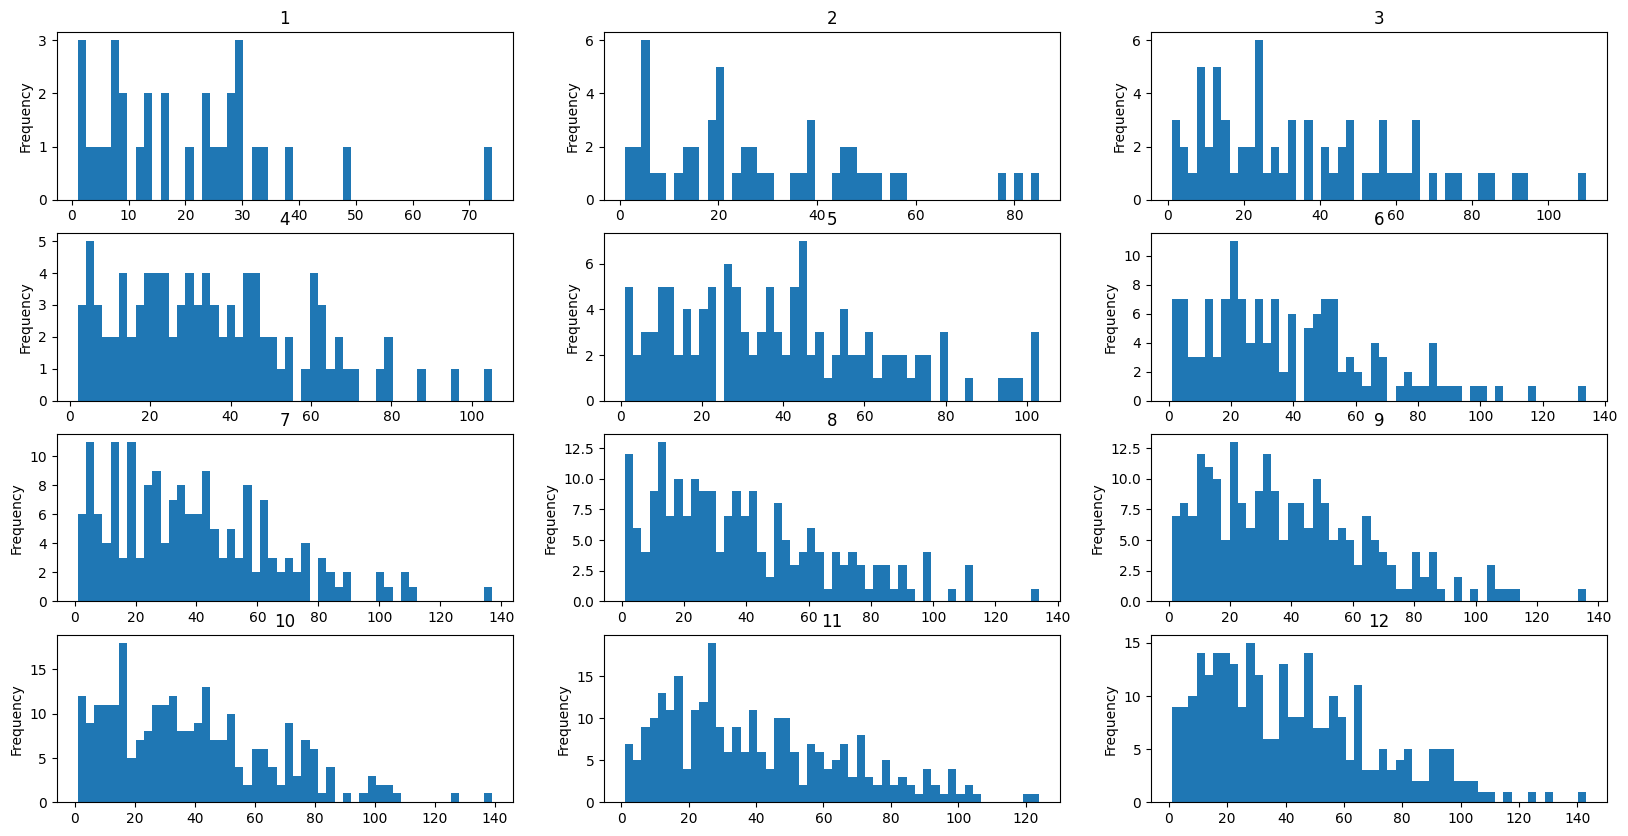

In [ ]:
for month in smart_messages_number.columns:
  plt.subplot(4,3,int(month))
  graph = smart_messages_number[month].plot(kind='hist', bins = 50, figsize = (20,10))
  graph.set_title(month)

Графики показывают, что я действительно поспешила с выводами. Наглядно видно, чем ближе к концу года, тем больше графики стремятся к подобию гауссианы — потому что данных становится больше, а чем больше данных, тем больше распределение стремится к нормальному.

Однако в первые три месяца есть значительные разрывы в данных, да и последующие графики очевидно скошены. Есть и выбросы, некоторые значения, расположенные ближе к началу (например, на 4 графике), значительно превышают выборочное среднее.

Взгляну на таблицу с описанием данных. Да, для апреля (ему соответствует 4 график) расстояние от минимума до Q1 и от Q3 до максимума не совпадает, но зато приблизительно равны значения от Q1 до медианы и от медианы до Q3.

Снова это связано с поведением пользователей тарифа Smart. Не все они становились абонентами, чтобы отправлять сообщения. Некоторые не пользуются этой услугой вовсе. Поэтому данные не упорядочены и распределение не симетрично.

Теперь обращусь к данным о сообщениях от пользователей тарифа Ultra.

In [ ]:
ultra_messages_number.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,7.000000,16.000000,25.000000,39.000000,52.000000,67.000000,73.000000,88.000000,95.000000,103.000000,113.000000,117.000000
mean,43.428571,32.937500,47.800000,44.512821,48.769231,52.313433,62.136986,58.897727,63.294737,69.776699,66.159292,72.008547
std,27.663798,26.709471,42.739521,37.526743,39.491183,43.996284,46.805245,44.977399,43.666501,49.260598,47.426742,48.609368
min,4.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
25%,23.000000,5.750000,20.000000,13.500000,21.000000,21.500000,27.000000,22.750000,27.000000,30.000000,28.000000,37.000000
50%,50.000000,35.500000,27.000000,34.000000,34.000000,39.000000,51.000000,47.500000,56.000000,61.000000,58.000000,61.000000
75%,64.500000,50.000000,68.000000,69.000000,66.250000,73.000000,91.000000,85.500000,89.000000,100.500000,94.000000,99.000000
max,75.000000,90.000000,155.000000,143.000000,148.000000,201.000000,211.000000,180.000000,188.000000,223.000000,197.000000,224.000000


Здесь уже нет очевидного роста среднего и медианного значений от 1 к последнему месяцу. Пользователя тарифа Ultra демонстрируют хаотичность в отправке собщений. Например, в первом месяце года их  меньше, чем в последнем (и пользователей, и сообщений), но зато количество сообщений в первом месяце очевидно превышает второй месяц года (и по медиане, и по среднему).

Посмотрю, сколько сообщений в год отправляют абоненты Ultra.

In [ ]:
print ('Пользователи тарифа Ultra отправляют', ultra_messages_number.median().median(), 'сообщений в год (медианное значение)')

Пользователи тарифа Ultra отправляют 48.75 сообщений в год (медианное значение)


Стандартное отклонение незначительное в сравнении со звонками, но если сравнивать со значением выборочного среднего — значительное. Если предположу нормальность распределения, снова ошибусь, как с пользователями тарифа Smart. Скорее всего, в последних месяцах года распределение будет стремиться к нормальному из-за выросшего количества абонентов, но в целом будут и выбросы, и скошенность. Проверю на графиках.

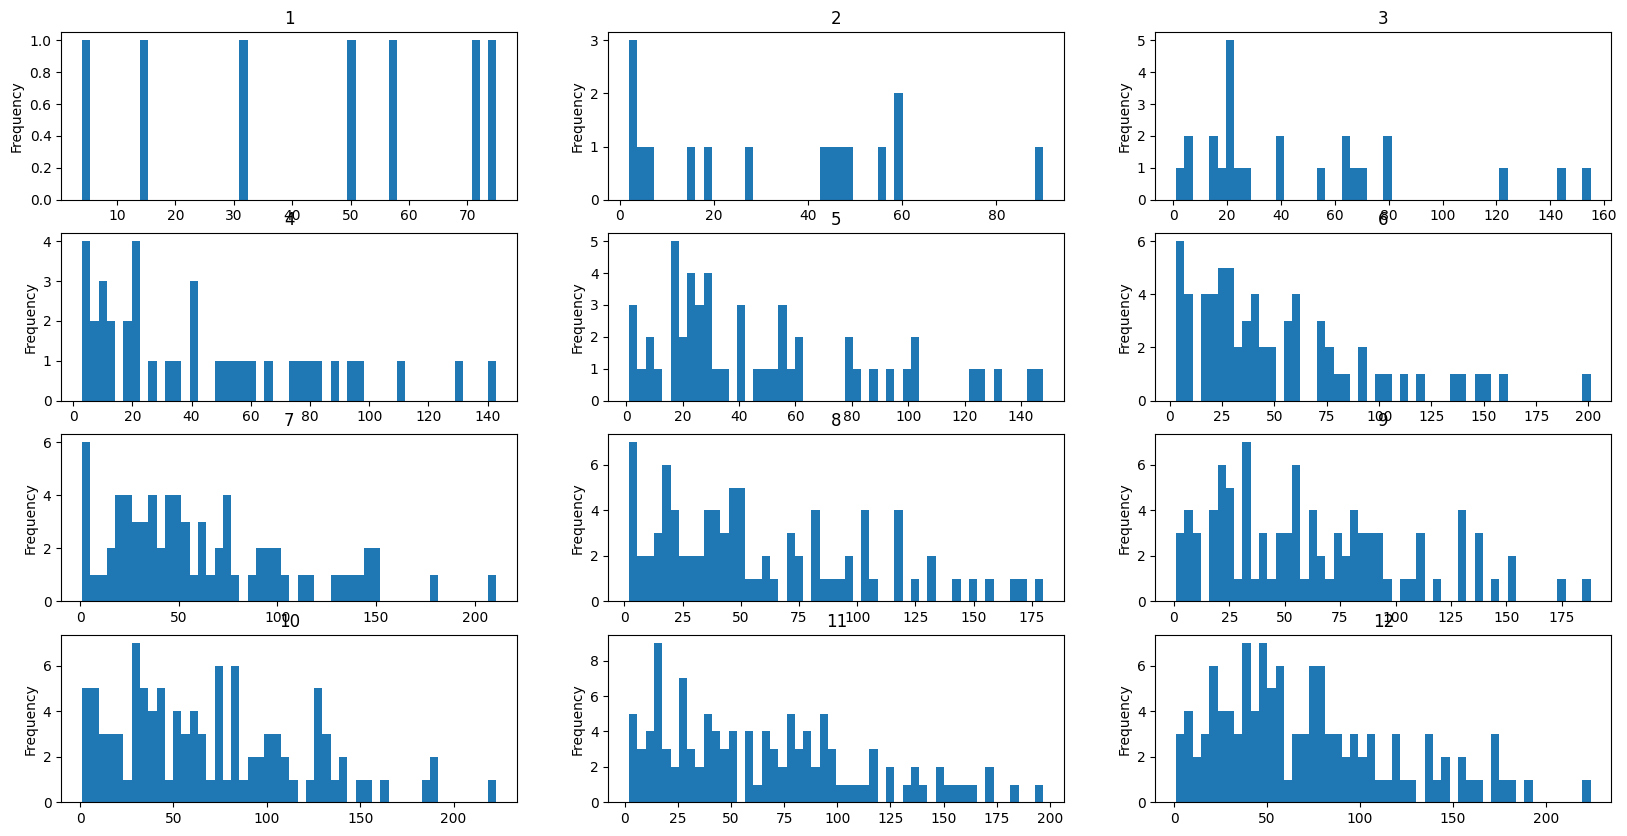

In [ ]:
for month in ultra_messages_number.columns:
  plt.subplot(4,3,int(month))
  graph = ultra_messages_number[month].plot(kind='hist', bins = 50, figsize = (20,10))
  graph.set_title(month)

Как и предполагалось, только последние графики отдаленно напоминают гауссиану. Первый график вовсе демонстрирует одинаковые значения по количеству отправленных сообщений разными пользователями. А на втором графике можно увидеть, что абонентов, отправивших меньше 10 сообщений, гораздо больше, чем любителей попереписываться через смс.

Распределение несимметричное, потому что пользователи тарифа Ultra не одинаково пользуются услугой смс. Одни не пишут сообщения вовсе, другие регулярно их отправляют, но поскольку упор в тарифе очевидно не на сообщениях (этой услугой пользуется меньше всего пользователей, как выяснилось раньше), нормальное распределение не выстраивается и данные не систематизируются.

### 4.3. Описание трафика

In [ ]:
internet_number = internet.pivot_table(index='user_id', columns = 'month', values='mb_used', aggfunc='sum')

Создам две новые таблицы. В **smart_internet_number** будет храниться информация о трафике абонентов Smart, а в **ultra_internet_number** — абонентов Ultra.

In [ ]:
smart_internet_number = pd.DataFrame()
ultra_internet_number = pd.DataFrame()

for index in internet_number.index:
  if index in smart_id:
    smart_internet_number = pd.concat([smart_internet_number, internet_number.loc[[index]]])
  if index in ultra_id:
    ultra_internet_number = pd.concat([ultra_internet_number, internet_number.loc[[index]]])
  else:
    continue

Выведу по 5 первых строк каждой таблицы на экран.

In [ ]:
smart_internet_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1005,2727.97,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,7800.93,12666.95,8668.19
1006,NaN,1392.15,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,19696.60,13259.41,18476.11
1007,NaN,NaN,NaN,8022.76,17687.27,13654.52,15656.66,20700.40,12613.05,14427.33,16369.61,12494.07


In [ ]:
ultra_internet_number.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9780.03,20737.13
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7382.23,19428.21


Теперь получу описание для таблицы **smart_internet_number**, чтобы узнать среднее, медиану, дисперсию каждого столбца и описание распределения.

In [ ]:
smart_internet_number.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,34.000000,58.000000,77.000000,112.000000,141.000000,164.000000,201.000000,234.000000,260.000000,293.000000,316.000000,337.000000
mean,8513.717647,11597.054310,15104.159091,13462.180625,15805.184326,15794.647988,15743.150348,16681.706068,16303.578808,16814.314437,16895.696646,18113.662047
std,6444.681014,6247.353833,5828.237537,5698.249092,5978.231725,5791.155586,5897.154446,5498.387304,5196.115749,5786.625388,5340.273416,5573.682673
min,539.360000,201.070000,2000.460000,528.470000,669.770000,478.960000,372.560000,2243.660000,370.060000,407.660000,588.890000,4515.410000
25%,3086.425000,7507.865000,11191.180000,9312.007500,12450.190000,12349.957500,12230.800000,13399.290000,12820.997500,13643.010000,13630.410000,14677.690000
50%,7096.185000,12553.710000,15670.250000,14087.650000,16323.940000,16077.440000,15925.290000,16834.710000,16028.435000,17259.920000,17013.800000,17713.510000
75%,11389.525000,15111.617500,20224.310000,17424.177500,19527.880000,19664.825000,19776.390000,20342.960000,20193.997500,20499.780000,20162.782500,21529.160000
max,24127.690000,28489.670000,24959.000000,27031.940000,29724.080000,33886.400000,29460.420000,31077.480000,31014.490000,32740.380000,36266.110000,38552.450000


Среднее и медианное значение растут от месяца к месяцу. Это объясняется количеством пользователей, добавляющихся к тарифу Smart.

Посмотрю, сколько мегабайт трафика нужно абонентам на один месяц.

In [ ]:
print('На один месяц абонентам Smart нужно', smart_internet_number.median().median(), 'мегабайт трафика (медианное значение)')

На один месяц абонентам Smart нужно 16052.9375 мегабайт трафика (медианное значение)


Стандартное отклонение в январе очень большое, а вот в декабре, если сравнивать со средним, уже гораздо меньше. Предположу, что на последних графиках распределение будет близко к нормальному и самые высокие по частоте значения слева и справа будут располагаться рядом со средним. Проверю на графиках.

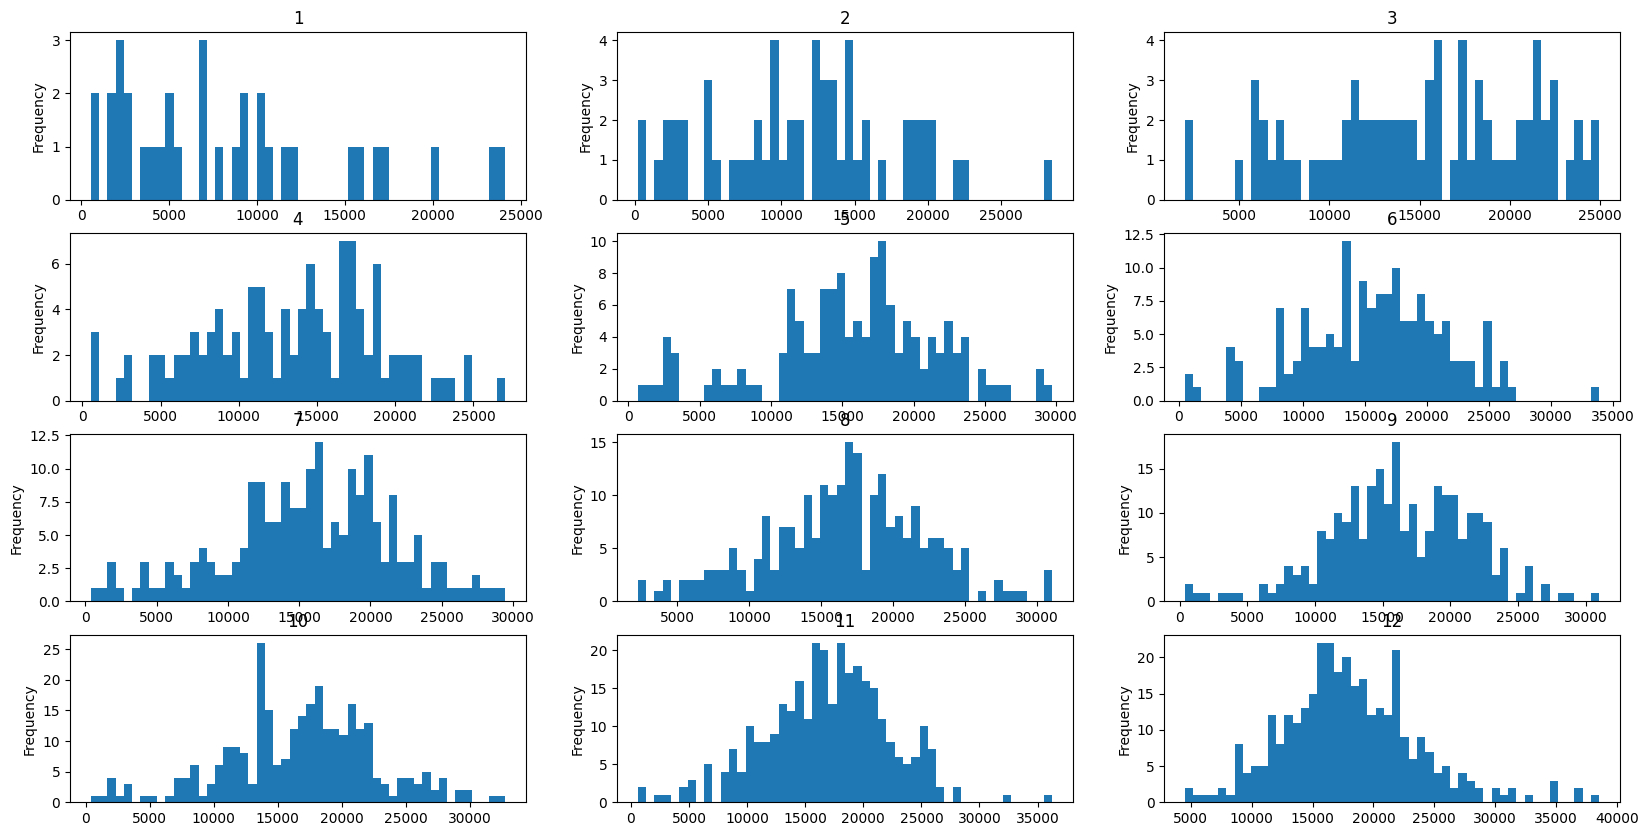

In [ ]:
for month in smart_internet_number.columns:
  plt.subplot(4,3,int(month))
  graph = smart_internet_number[month].plot(kind='hist', bins = 50, figsize = (20,10))
  graph.set_title(month)

Действительно, уже с 4 графика (с апреля) распределение начинает стремиться к нормальному. Хотя в данных есть выбросы, их можно объяснить тем, что интернет — тоже не основная причина, по которой некоторые пользователи подключили тариф Smart. Но учитывая, что эти графики наиболее напоминают гауссиану, я сделаю предположение, что именно ради интернета многие все-таки становятся абонентами "Мегалайна" и выбирают этот тариф.

Посмотрю описание на примере 1 и 12 столбца.

У 1 набора данных слишком высокое значение стандартного отклонения, а расстояния между минимумом и Q1 гораздо меньше расстояния между Q3 и максимумом. Зато между Q1 и медианой и медианой и Q3 расстояния сравнимы.

У 12 набора картина похожая, при этом сам график больше напоминает гауссиану. Я предполагаю, что дело в количестве данных. В декабре количество пользователей тарифа Smart, а значит, и пользователей интернета, выросло, поэтому распределение стало стремиться к нормальному. Если бы такое же количество пользователей "зашло" в январе, я бы наблюдала в целом похожий результат.

Теперь получу описание для таблицы **ultra_internet_number**, чтобы узнать среднее, медиану, дисперсию каждого столбца и описание распределения.

In [ ]:
ultra_internet_number.describe()

month,1,2,3,4,5,6,7,8,9,10,11,12
count,9.000000,22.000000,37.000000,55.000000,65.000000,83.000000,90.000000,106.000000,114.000000,122.000000,133.000000,138.000000
mean,13140.681111,12846.477273,17535.550270,16828.134364,19958.942308,19152.950602,20723.394778,19760.734434,19372.735702,20209.643361,19935.585489,21951.094130
std,6865.346875,10473.403015,10951.785885,9718.649845,9591.719819,9109.904861,9883.022284,10349.849601,9353.599420,9671.980860,9793.580544,10247.207641
min,656.750000,959.510000,3059.850000,530.780000,2253.490000,2538.670000,2696.040000,1619.610000,492.030000,439.610000,2450.040000,365.090000
25%,8152.070000,4380.332500,6195.540000,9983.775000,13403.980000,11537.355000,14032.102500,11836.767500,12165.732500,14064.932500,12458.330000,14846.510000
50%,14791.370000,9654.830000,17495.180000,16645.780000,19131.610000,19660.380000,20016.490000,19010.645000,19951.265000,20355.255000,18512.220000,21997.450000
75%,19280.100000,20340.562500,27807.120000,23057.835000,27350.270000,25210.550000,27088.785000,28055.927500,27203.527500,26273.000000,26951.160000,28108.790000
max,19685.010000,32625.350000,37328.410000,37111.140000,43824.900000,42250.680000,45180.710000,48351.590000,42181.860000,49745.690000,44296.860000,43931.360000


Если сравнивать первый и последний месяц, то и среднее, и медиана выросли. Но, как и в ситуации со звонками, и с сообщениями, пользователи тарифа Ultra не демонстрируют линейный рост показателей, он волнообразный.

Посмотрю, сколько трафика в месяц нужно абонентам Ultra.

In [ ]:
print('Абонентам тарифа Ultra нужно', ultra_internet_number.median().median(), 'мегабайт в месяц (медианное значение)')

Абонентам тарифа Ultra нужно 19071.127500000002 мегабайт в месяц (медианное значение)


Стандартное отклонение очень большое. Конечно, финальные графики, из-за роста количества абонентов, будут демонстрировать распределение, стремящееся к нормальному, но в целом уже сейчас его можно охарактеризовать как несимметричное. Проверю на графиках.

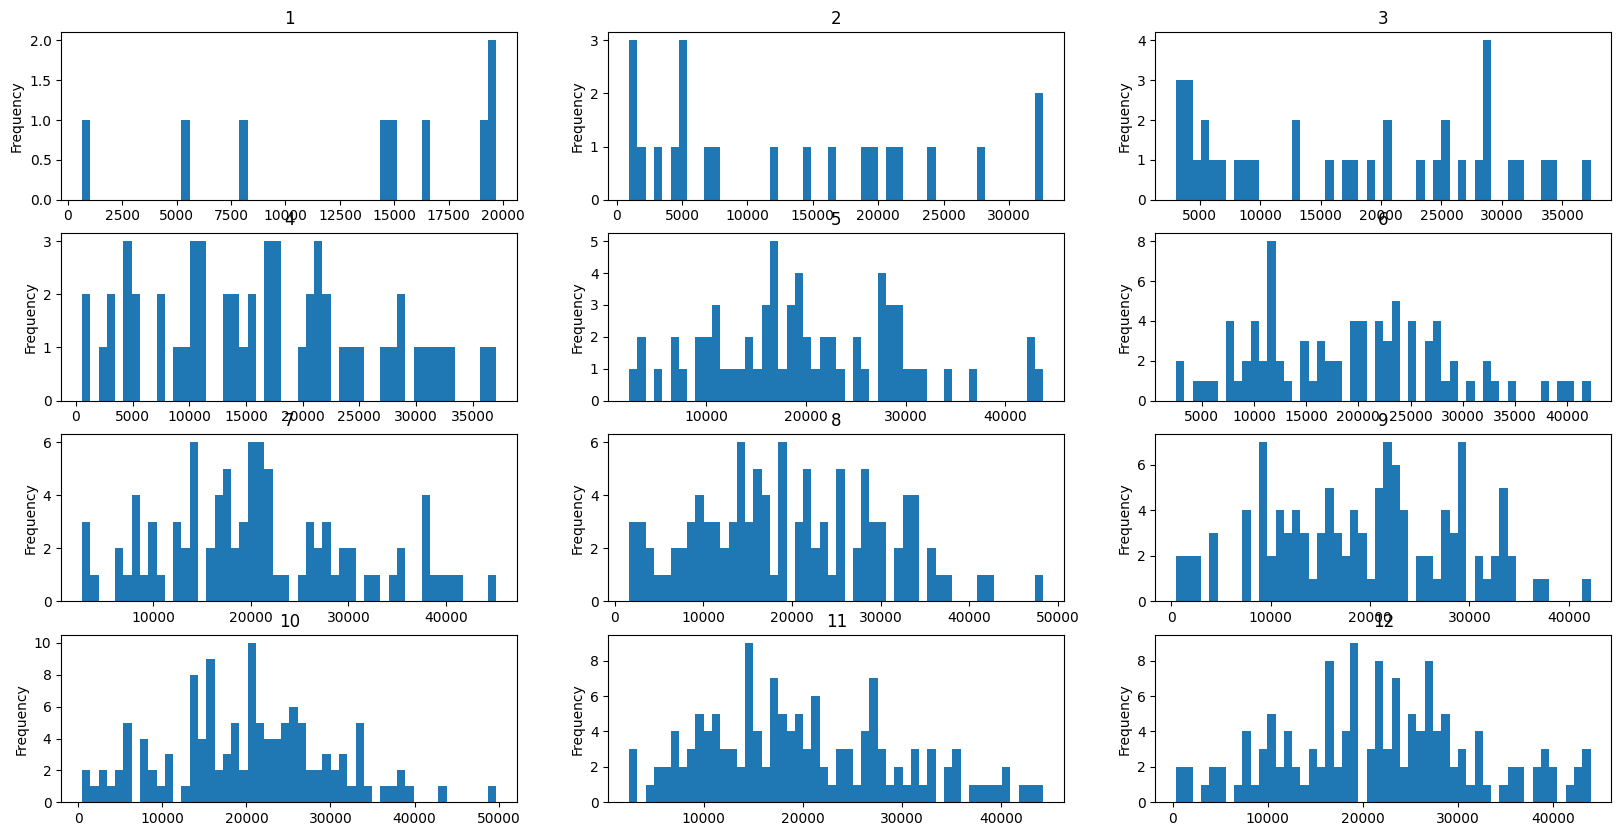

In [ ]:
for month in ultra_internet_number.columns:
  plt.subplot(4,3,int(month))
  graph = ultra_internet_number[month].plot(kind='hist', bins = 50, figsize = (20,10))
  graph.set_title(month)

Как и предполагалось, графики далеки от гауссианы. Есть выбросы, как, например, на 6 графике. И есть провалы в значениях, близких к среднему. Это легко объяснить: далеко не все пользователи тарифа Ultra выходят в интернет часто и надолго. Вот и не распределяются данные нормально.

Судя по описанию, между минимальными значениями и Q1, и между Q3 и максимальными значениями — огромные расстояния. Это значит, что крайних данных, которых должно быть незначительное количество, на самом деле очень много. А вот в основном промежутке, от Q1 до Q3 их недостаточно, чтобы перекрыть эти крайние значения и продемонстрировать нормальное распределение.

### Вывод:

Пользователям тарифа Smart в месяц нужно:
- 421 минута
- 34 сообщения
- 16052 мегабайт трафика

Пользователям тарифа Ultra в месяц нужно:
- 522 минуты
- 49 сообщений
- 19071 мегабайт трафика

Все графики демонстрируют, что только с ростом числа абонтов данные распределяются нормально, но в общем они хаотичны и распределение несимметрично. Объясняю это тем, что у каждого пользователя своя причина подключить тот или иной тариф, не все они равномерно пользуются услугами, и по этой причине данные не получается упорядочить.

## 5. Гипотезы

### 5.1. Разделение на группы по тарифному плану

Создам две отдельные таблицы, разбив пользователей по тарифам.

В таблице smart_users будут храниться только пользователи тарифа Smart

In [ ]:
smart_users = final_data[final_data['tariff']=='smart'].reset_index(drop=True)

Выведу первые 5 строк таблицы.

In [ ]:
smart_users.head()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
1,1002,smart,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
2,1005,smart,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
3,1006,smart,NaN,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
4,1007,smart,NaN,NaN,NaN,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0


Проверю, сколько клиентов используют тариф Smart.

In [ ]:
print('Пользователей тарифа Smart:', len(smart_users))

Пользователей тарифа Smart: 351


Теперь создам таблицу для пользователей тарифа Ultra — ultra_users.

In [ ]:
ultra_users = final_data[final_data['tariff']=='ultra'].reset_index(drop=True)

Выведу первые 5 строк таблицы.

In [ ]:
ultra_users.head()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
2,1004,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
3,1013,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0
4,1016,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0


Проверю, сколько пользователей подключены к тарифу Ultra.

In [ ]:
print('Пользователей тарифа Ultra:', len(ultra_users))

Пользователей тарифа Ultra: 149


351 (пользователь Smart) + 149 (пользователей Ultra) действительно = 500. Данные поделены корректно.

Посмотрю, а сколько платят в месяц пользователи разных тарифов (выведу среднее и медианное значение).

In [ ]:
print(
    'Пользователи тарифа Smart платят:\n-среднее значение —', smart_users.mean()[1:].mean(), '\n-медианное значение —', smart_users.median()[2:].median(),
    '\nПользователи тарифа Ultra платят:\n-среднее значение —', ultra_users.mean()[1:].mean(), '\nмедианное значение —', ultra_users.median()[2:].median()
)

Пользователи тарифа Smart платят:
-среднее значение — 1181.9019408127065 
-медианное значение — 986.0 
Пользователи тарифа Ultra платят:
-среднее значение — 2046.9773260862373 
медианное значение — 1950.0


<ipython-input-109-ebe400ef0574>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Пользователи тарифа Smart платят:\n-среднее значение —', smart_users.mean()[1:].mean(), '\n-медианное значение —', smart_users.median()[2:].median(),
<ipython-input-109-ebe400ef0574>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Пользователи тарифа Smart платят:\n-среднее значение —', smart_users.mean()[1:].mean(), '\n-медианное значение —', smart_users.median()[2:].median(),
<ipython-input-109-ebe400ef0574>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  

Настало время разобраться, что же демонстрируют эти данные о доходах от пользователей.

### 5.2. Гипотеза №1.
Средняя выручка пользователей тарифов Ultra равна среднему числу выручки пользователей тарифа Smart.

**Альтернативная гипотеза:** средняя выручка пользователей тарифов Ultra и Smart различается.

В таблице с доходами хранится и другая информация, а мне нужны только значения средних по месяцам, чтобы на их основе определить, принимается или отклоняется нулевая гипотеза. Поэтому я создам два списка с информацией о помесячном среднем пользователей Smart и Ultra.

In [ ]:
smart_users_mean = [mean for mean in smart_users.mean()[1:]]
ultra_users_mean = [mean for mean in ultra_users.mean()[1:]]

<ipython-input-110-01e552f84013>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  smart_users_mean = [mean for mean in smart_users.mean()[1:]]
<ipython-input-110-01e552f84013>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ultra_users_mean = [mean for mean in ultra_users.mean()[1:]]


Теперь проверю, равны ли средние.

In [ ]:
alpha = 0.05
results = st.ttest_ind(smart_users_mean, ultra_users_mean, equal_var = False)
p_value = results.pvalue

print('p_value:', p_value)

if p_value < alpha:
  print ('Нулевая гипотеза отклоняется. Средняя выручка пользователей тарифов Smart и Ultra разная.')
else:
  print ('Нулевая гипотеза принимается. Средняя выручка пользователей тариов Smart и Ultra равна.')

p_value: 3.283930413565106e-08
Нулевая гипотеза отклоняется. Средняя выручка пользователей тарифов Smart и Ultra разная.


Средняя выручка пользователей двух тарифов разная. Поэтому нулевая гипотеза отклоняется. Событие не попало в зону уровня значимости p_value, к тому же он слишком маленький, чтобы это случилось.

### 5.3. Гипотеза №2.
Средняя выручка пользователей из Москвы равна средней выручке от пользователей из других регионов.

**Альтернативная гипотеза:** средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

Здесь мне нужна информация о месте жительства пользователей, но мне не важно, какой у них тарифный план. Поэтому для начала к таблице final_data я добавлю столбец из таблицы users.

In [ ]:
final_data['city'] = users['city']

А теперь создам две таблицы, в одну помещу данные о пользователях из Москвы, в другую — из остальных городов России.

In [ ]:
moscow_users = final_data[final_data['city']=='Москва'].reset_index(drop=True)

In [ ]:
other_region_users = final_data[final_data['city'] != 'Москва'].reset_index(drop=True)

Проверю, правильно ли поделились даные. Если в сумме пользователей из Москвы и других регионов будет 500, значит, данные не потерялись, и можно приступать к проверке гипотезы.

In [ ]:
print(
    'Количество пользователей из Москвы:', len(moscow_users),
    '\nКоличество пользователей из других регионов:', len(other_region_users),
    '\nВсего пользователей в двух таблицах:', len(moscow_users), '+', len(other_region_users), '=', len(moscow_users)+len(other_region_users)
)

Количество пользователей из Москвы: 99 
Количество пользователей из других регионов: 401 
Всего пользователей в двух таблицах: 99 + 401 = 500


Все верно. Теперь проверю гипотезу, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Сначала получу списки с данными, которые нужны в работе.

In [ ]:
moscow_users_mean = [mean for mean in moscow_users.mean()[1:]]
other_region_users_mean = [mean for mean in other_region_users.mean()[1:]]

<ipython-input-116-96c2714ccbe3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moscow_users_mean = [mean for mean in moscow_users.mean()[1:]]
<ipython-input-116-96c2714ccbe3>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  other_region_users_mean = [mean for mean in other_region_users.mean()[1:]]


Теперь проверю равенство средних.

In [ ]:
alpha = 0.05
results = st.ttest_ind(moscow_users_mean, other_region_users_mean, equal_var = False)
p_value = results.pvalue

print('p_value:', p_value)

if p_value < alpha:
  print('Гипотеза отклоняется. Средний доход от пользователей из Москвы не равен среднему доходу от пользователей из других регионов')
else:
  print('Гипотеза принимается. Средний доход от пользователей из Москвы равен среднему доходу от пользователей из других регионов')

p_value: 0.2478502483819242
Гипотеза принимается. Средний доход от пользователей из Москвы равен среднему доходу от пользователей из других регионов


Удивительно, но несмотря на разное количество людей в наборах данных средние очень близки друг к другу. От 99 абонентов из Москвы компания получила почти столько же денег, сколько от 401 абонента из других городов.

Учитывая это, нужно уточнить результат проверки. В целом "Мегалайн" получит одинаковый доход с двух групп, однако одну и ту же сумму заплатит меньше москвичей, но больше жителей других регионов России. Это нужно иметь в виду.

### Вывод:
- гипотеза №1 — о равенстве среднего дохода от пользователей разных тарифов — не подтвердилась;
- гипотеза №2 — о равенстве дохода от абонентов из Москвы и других регионов — подтвердилась. Хотя пользователей из Москвы меньше, денег компании они приносят больше.

## Общий вывод

1. В выборке оказались люди, переставшие быть абонентами. Благодаря им удалось выяснить: на тарифе Ultra задерживаются дольше (119 дней против 95 Smart), и отказываются от него меньше людей — 15 против 23 Smart. Однако и в целом тариф Ultra выбирают меньше людей (149), чем тариф Smart (351). Поэтому здесь важнее смотреть не на количество ушедших людей, а на количество дней, которые они были абонентами.

2. Нулевые звонки и нулевой трафик не представляют ценности в данных, эти значения были удалены. Работа шла только с данными, которые затем можно обратить в выручку.

3. Абонентам предлагают три вида услуг — звонки, сообщения и выход в интернет. Для каждой из них я создала сводную таблицу, чтобы видеть помесячный расход минут, сообщений и трафика для каждого пользователя.
Не все 500 пользователей используют все услуги. Так, звонят только 492 юзера, пишут смс 426 человек, а в интернет выходят 498.

4. Графики по числу отправленных сообщений, потраченного трафика и проговоренных минут показывают: нельзя определить, какая именно услуга является главной для абонентов. Распределение везде несимметричное, и стремится к нормальному только с увеличением числа пользователей тарифа. Нужно развивать все три услуги.

Зато можно сказать, нужно ли корректировать лимиты.

Пользователям тарифа Smart нужно:
- 421 минута
- 34 сообщения
- 15,7 гигабайт трафика

В среднем платят: 1182

Медианная оплата: 976

Пользователям тарифа Ultra нужно:
- 522 минуты
- 49 сообщений
- 18,6 гигабайт трафика

В среднем платят: 2047

Медианная оплата: 1950

Текущие лимиты тарифа Smart:
- 500 минут разговора
- 50 сообщений
- 15 Гб интернет-трафика

Ежемесячная плата: 500 рублей.

Текущие лимиты тарифа Ultra:
- 3000 минут разговора
- 1000 сообщений
- 30 Гб интернет-трафика

Ежемесячная плата: 1950 рублей.

5. Абоненты из Москвы и других регионов России приносят компании одинаковую выручку. Но если сравнивать пользователей тарифов Smart и Ultra, то доходов от абонентов Ultra больше.

##Мое предложение
- пересмотреть тарифный план Smart. Сейчас он менее выгодный по соотношению лимитов и оплаты. И медианный, и средний расход абонентов в месяц почти в два раза выше установленной абонентской платы. Можно увеличить лимиты и поднять стоимость тарифного плана, тогда именно переплата будет меньше и у клиентов не будет ощущения невыгодного вложения средств, возможно оставаться и подключаться к тарифному плану Smart будут еще охотнее.
- пересмотреть тарифный план Ultra. Несмотря на то, что он оказывается более выгодным для абонентов (минимум переплаты), клиентов, приходящих на этот тариф, меньше. Возможно, стоит добавить услугу, не влияющую на расход на абонента, но делающую тариф привлекательнее. Как вариант, снизить количество трафика, при этом сообщить, что пользование соцсетями и мессенджерами бесплатно. 30 гигабайт будет достаточно для покрытия всех услуг, но ощущение бесплатности привлечет клиентов. 

*
**Инструкция по выполнению проекта**

**Подготовьте данные**
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть.
- Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
- Посчитайте для каждого пользователя:

  количество сделанных звонков и израсходованных минут разговора по месяцам;

  количество отправленных сообщений по месяцам;

  объем израсходованного интернет-трафика по месяцам;

  помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Проанализируйте данные**
- Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение.
- Постройте гистограммы. Опишите распределения.

**Проверьте гипотезы**
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

**Напишите общий вывод**